In [1]:
from IPython.display import Image

# Agglomerative Hierarchical Clustering (AHC)

Sources: 
- Dr. Roi Yehoshua, Hierarchical Clustering, https://medium.com/ai-made-simple/hierarchical-clustering-d828ad1386dd
- Shubhasmita Roy, Agglomerative Hierarchical Clustering — a gentle intro with an example program, https://medium.com/geekculture/agglomerative-hierarchical-clustering-a-gentle-intro-with-an-example-program-4b7afe35fd4b
- Abubakar Auwal Khalid, Agglomerative Hierarchical Clustering: A Study and Implementation in Python, https://medium.com/@khalidassalafy/agglomerative-hierarchical-clustering-a-study-and-implementation-in-python-fddfdb6a7a64
- Harshit Dawar, Deep dive Agglomerative Clustering!, https://medium.com/analytics-vidhya/deep-dive-agglomerative-clustering-e9af2bfd8daf


**Agglomerative clustering (bottom-up approach):**

- Starts with each data point as a separate cluster.
- Merges in each successive step merges the two clusters that are closest to each other. 
- This process continues until all data points are in a single cluster. 

**Divisive clustering (top-down approach):** 
- Starts with all data points in one cluster.
- Iteratively splits the most heterogenous cluster into two clusters. 
- This process continues until each data point becomes its own cluster.

**Dendrogram:**
 
- A tree-like structure that shows the sequence in which clusters were merged (or split) and the distance at which each merge (or split) took place.
- Used to determine the desired number of clusters in the final output.

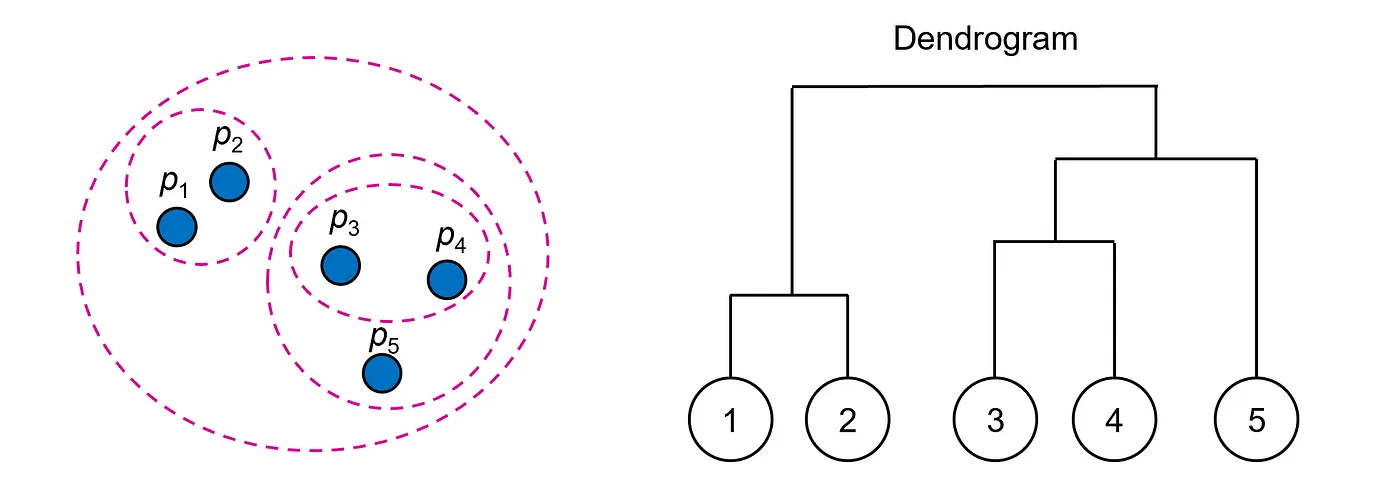

In [2]:
Image(filename="figures/ahc1.png", width=500)

### Linkage Methods

Distance between two clusters can be defined via different linkage methods:

#### 1. Single linkage (MIN) 

Minimum distance between any point in the first cluster and any point in the second cluster.



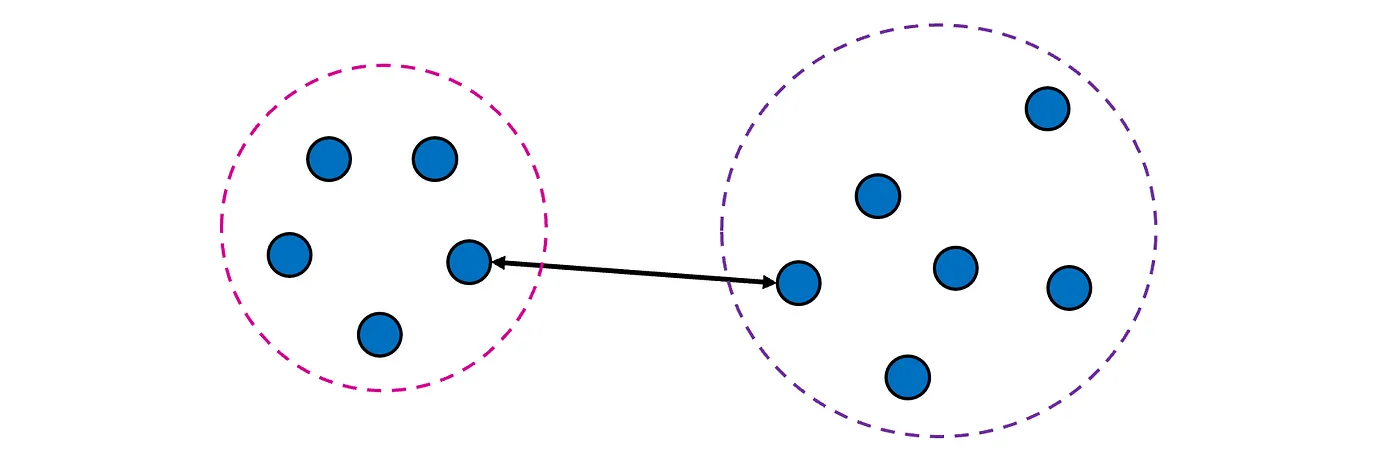

In [3]:
Image(filename="figures/ahc2.png", width=500)

Pros:
- Can capture clusters of non-elliptical shapes, such as elongated clusters or clusters with more complex geometries.
- Supports various distance metrics.

Cons:
- Sensitive to noise and outliers.
- Prone to the “chaining” effect, where clusters that are actually separate can be connected by a series of intermediate points that act as bridges.

#### 2. Complete linkage (MAX)

Maximum distance between any point in the first cluster and any point in the second cluster.

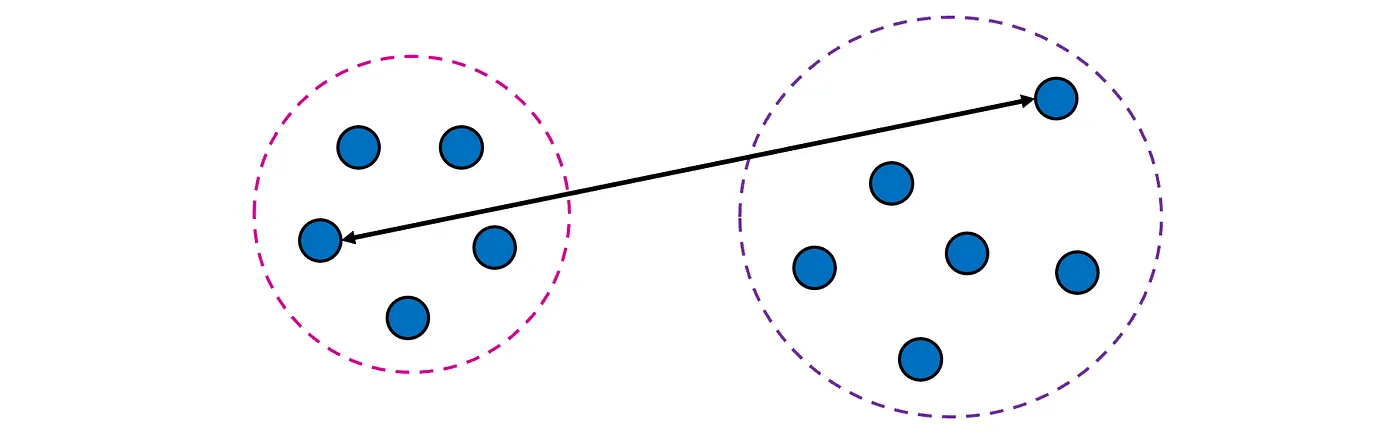

In [4]:
Image(filename="figures/ahc3.png", width=500)

Pros:
- Less susceptible to noise and outliers.
- Supports various distance metrics.

Cons:
- Tends to break large clusters.
- Struggles to capture clusters of non-elliptical shape.

#### 3. Average linkage

Average distance between each pair of points from the two clusters.

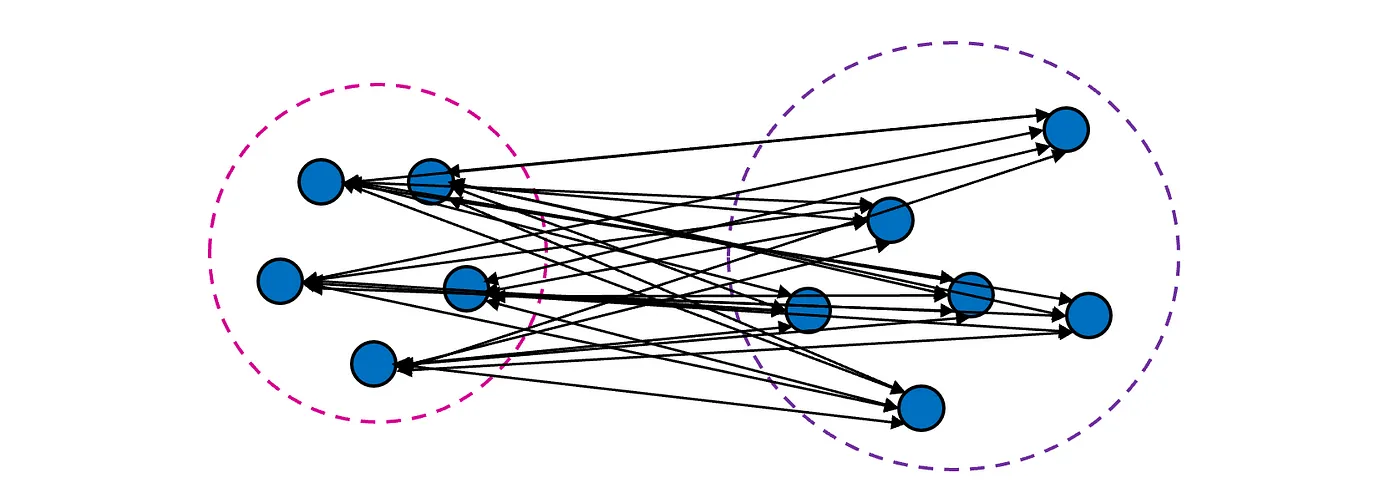

In [5]:
Image(filename="figures/ahc4.png", width=500)

Pros:
- Provides a balance between single and complete linkage.
- Less sensitive to noise and outliers as compared to single linkage.

Cons:
- Biased towards globular clusters.

#### 4. Centroid linkage

Distance between two clusters as the distance between their centroids (or means).

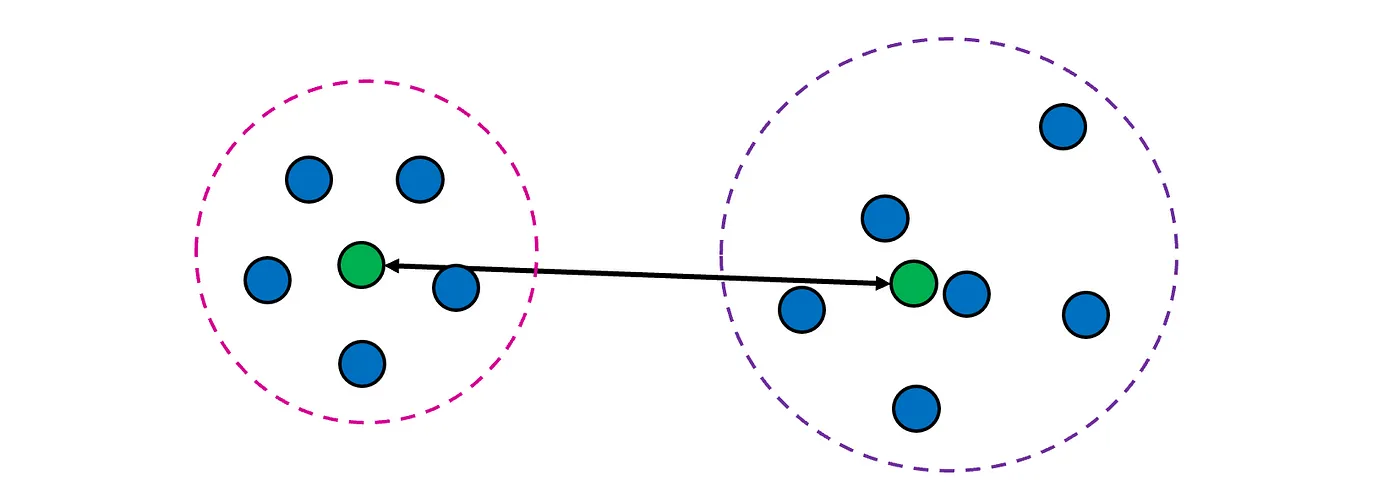

In [6]:
Image(filename="figures/ahc5.png", width=500)

Pros:
- Intuitive, as it considers the central tendency of the clusters.
- Less sensitive to noise and outliers as compared to single linkage.

Cons:
- Less suitable for capturing non-elliptical clusters.
- Can suffer from the “inversion phenomenon”, where merging two clusters decreases their distance to other clusters.
- Supports only the Euclidean distance metric.

#### 5. Ward’s method

Distance between two clusters as the increase in the within-cluster sum of squared distances (WCSS) when the two clusters are merged.

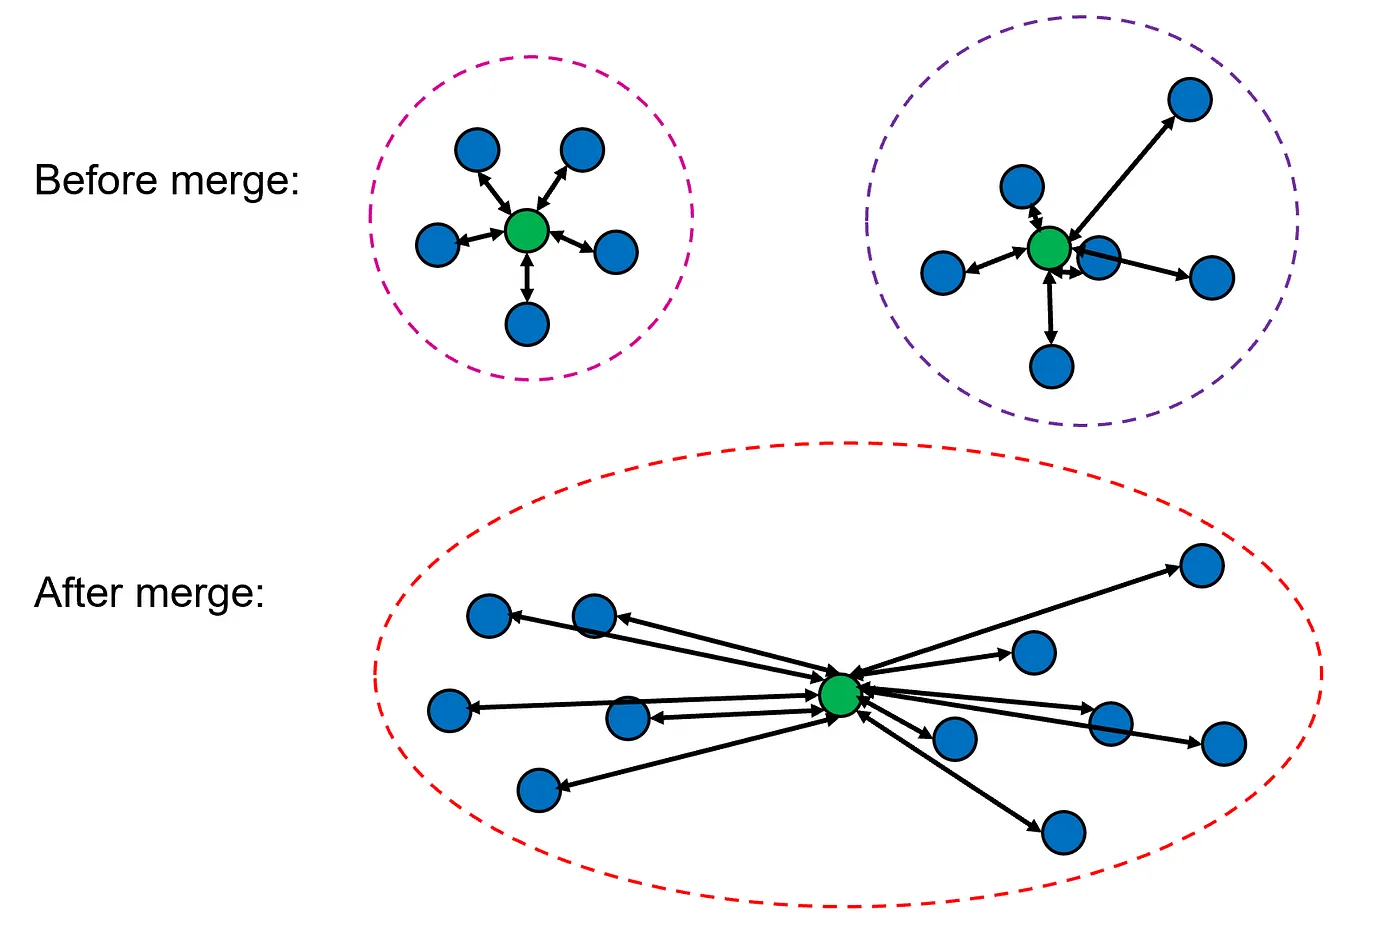

In [7]:
Image(filename="figures/ahc6.png", width=500)

Pros:
- Tends to produce compact and equally-sized clusters (similar to k-means).
- Less sensitive to noise and outliers as compared to single linkage.

Cons:
- Assumes that the clusters have approximately the same size.
- Less suitable for capturing non-elliptical clusters.
- Supports only the Euclidean distance metric.

### The Agglomerative Clustering Algorithm

Initialization: 
- Start with each data point as its own cluster.
- Iteratively merge the closest clusters until only one cluster is left by following these steps:
    * (a) Find the closest pair of clusters C₁ and C₂ based on the linkage criterion.
    * (b) Merge C₁ and C₂ into a new cluster C.
    * (c) Update the distance matrix by merging the rows and columns of C₁ and C₂, and computing for each cluster C’ the distance between C’ and the new cluster C using the linkage function.
- Return a hierarchical representation of the clusters.

#### Agglomerative Clustering in SciPy

`scipy.cluster.hierarchy` provides functions for hierarchical agglomerative clustering.

`scipy.cluster.hierarchy.linkage()` is the main function for performing agglomerative clustering:

- **y**: Can be either a a 2-D array of data points or a condensed 1-D distance matrix (i.e., a flat array containing the upper triangular of the distance matrix).
- **method**: The linkage method. Can be either 'single' (the default), ‘complete’, 'average', 'weighted', 'centroid', 'median', or 'ward'.
- **metric**: The distance metric to use (defaults to 'euclidean').




In [8]:
import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

In [9]:
X = np.array([[0, 1], [1, 4], [1, 9], [2, 2], [2, 7], 
              [3, 8], [4, 7], [5, 3], [6, 4], [7, 3]])

In [10]:
Z = hierarchy.linkage(X, method='single', metric='sqeuclidean')
Z

array([[ 4.,  5.,  2.,  2.],
       [ 6., 10.,  2.,  3.],
       [ 7.,  8.,  2.,  2.],
       [ 9., 12.,  2.,  3.],
       [ 0.,  3.,  5.,  2.],
       [ 1., 14.,  5.,  3.],
       [ 2., 11.,  5.,  4.],
       [15., 16., 10.,  7.],
       [13., 17., 10., 10.]])

Text(0, 0.5, 'Distance')

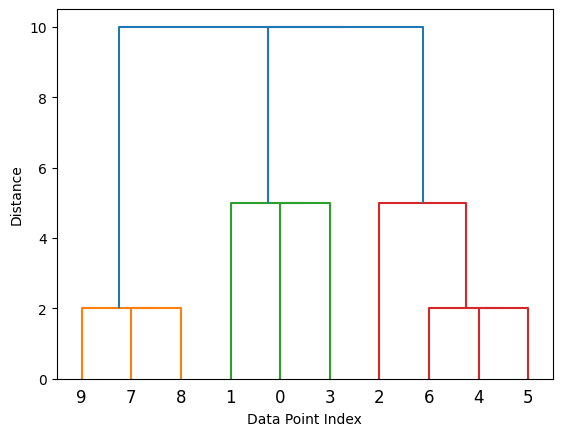

In [11]:
hierarchy.dendrogram(Z)
plt.xlabel('Data Point Index')
plt.ylabel('Distance')

In [12]:
# Flat clustering from our dendrogram by cutting it at distance of 5:

# Z: The linkage matrix returned from the linkage() function.
# t: The threshold to apply when forming flat clusters.
# criterion: The criterion to use in forming flat clusters. 
# Common criteria include:
# - 'distance' for specifying a distance cutoff
# - ‘maxclust’ to specify a maximum number of clusters.
    
hierarchy.fcluster(Z, t=5, criterion='distance')

array([2, 2, 3, 2, 3, 3, 3, 1, 1, 1], dtype=int32)

#### Agglomerative Clustering in Scikit-Learn


The important hyperparameters of the `AgglomerativeClustering` class are:

- **n_clusters:** The number of clusters to find (defaults to 2).
- **linkage:** The linkage method to use. Can be 'ward' (the default), 'single', 'complete', or 'average'.
- **metric:** The distance metric to use. Can be 'euclidean' (the default), 'l1', 'l2', 'manhattan', 'cosine', or 'precomputed'. If the linkage method is 'ward', then only 'euclidean' is accepted.
- **distance_threshold:** The distance threshold above which clusters will not be merged (defaults to None). If not None, n_clusters must be set to None.


In [13]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

X, y = make_blobs(n_samples=500, centers=3, cluster_std=0.6, random_state=0)

In [14]:
X = StandardScaler().fit_transform(X)

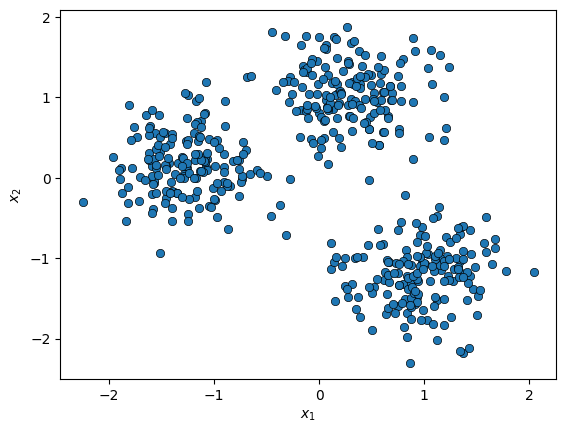

In [15]:
def plot_data(X):
    sns.scatterplot(x=X[:, 0], y=X[:, 1], edgecolor='k', legend=False)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

plot_data(X)

In [16]:
def plot_clusters(X, labels):
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='tab10', edgecolor='k', legend=False)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

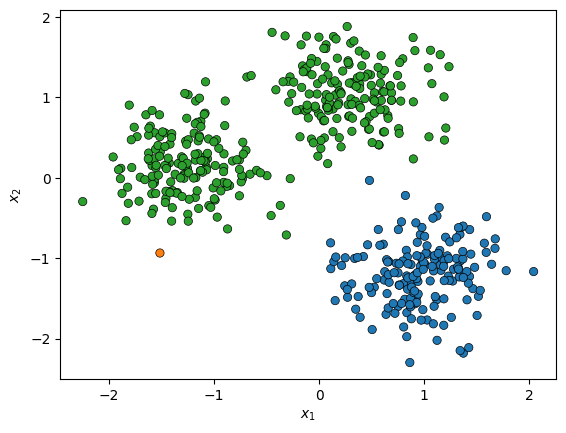

In [17]:
# Single linkage:
agg = AgglomerativeClustering(n_clusters=3, linkage='single')
agg.fit(X)

plot_clusters(X, agg.labels_)

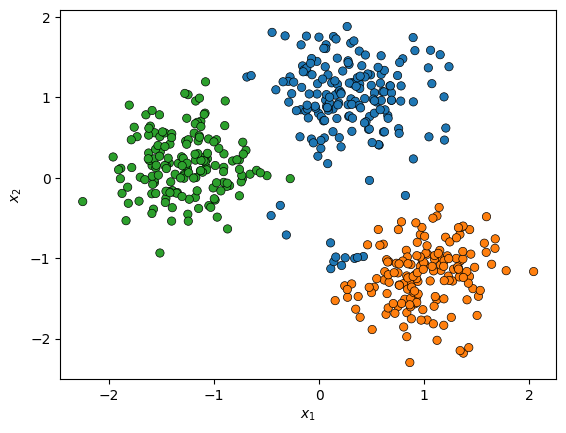

In [18]:
# Complete limkage:
agg = AgglomerativeClustering(n_clusters=3, linkage='complete')
agg.fit(X)

plot_clusters(X, agg.labels_)

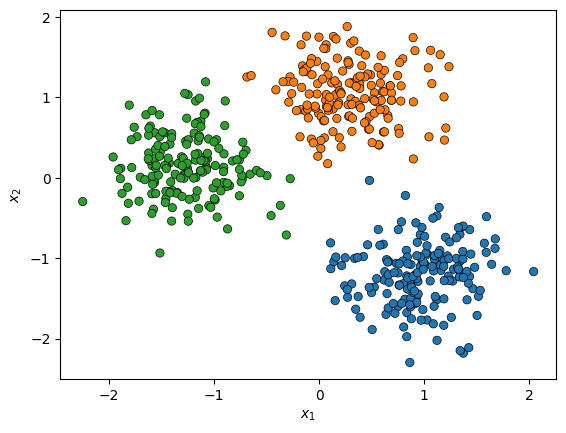

In [19]:
# Ward's method:
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg.fit(X)

plot_clusters(X, agg.labels_)

#### The fastcluster Library

- Uses a memory efficient representation of the distance matrix, which can save both computation time and memory when the dataset is large.

- Avoids unnecessary distance recomputations when possible.

- Provides an efficient implementation of the Ward and centroid methods that scales as O(n²logn), whereas a naive implementation requires O(n³).

- Primarily written in C++, which minimizes the overhead associated with Python function calls and data type conversions.

In [20]:
!pip install fastcluster

In [21]:
X, y = make_blobs(n_samples=25000, centers=3, random_state=0)
X = StandardScaler().fit_transform(X)

In [22]:
%timeit Z = hierarchy.linkage(X, method='single')

11.5 s ± 1.33 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
import fastcluster

%timeit Z = fastcluster.linkage(X, method='single')

11.3 s ± 1.15 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Example:

In [25]:
import numpy as np
import pandas as pd
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

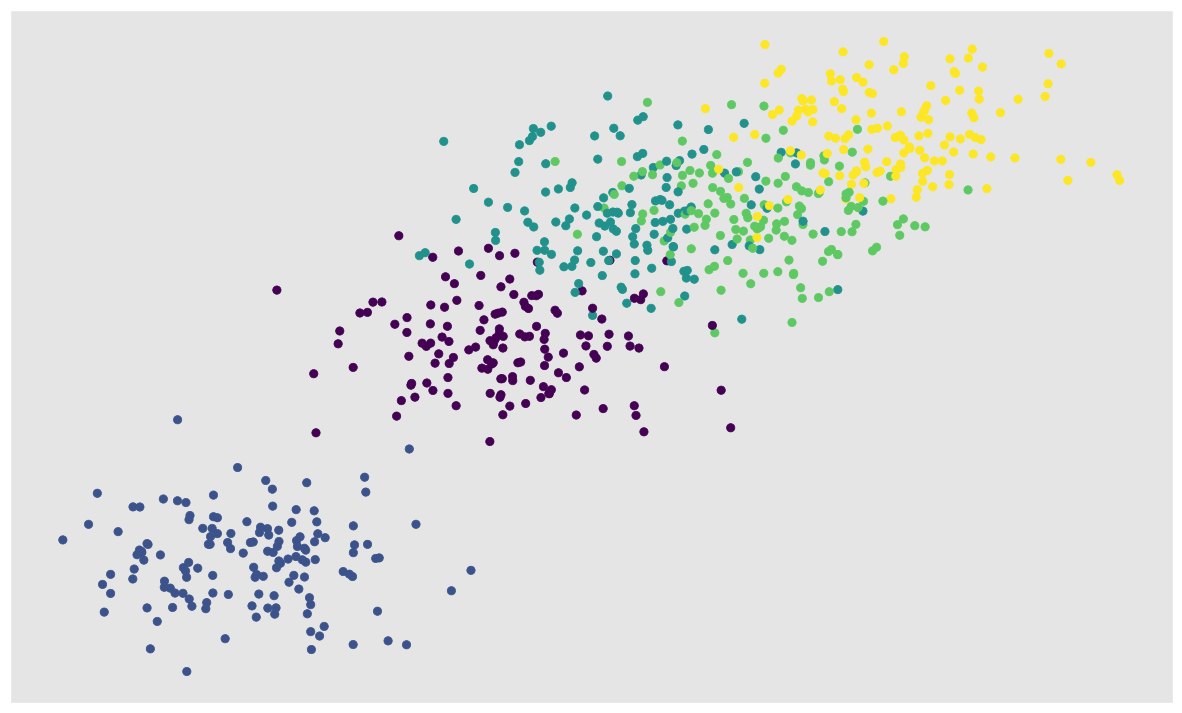

In [26]:
X, y = make_blobs(n_samples=700,
                  centers=[[3,3],
                           [-1, -3],
                           [5,7],
                           [7,7],
                           [9,9]],
                  cluster_std=1.3)

plt.style.use("ggplot")

plt.figure(figsize=(15,9))

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.xticks([])
plt.yticks([])

plt.show()

In [27]:
# Initializing Agglomerative clustering with initial parameters
agglomerative_cluster = AgglomerativeClustering(
                                                n_clusters=5,
                                                # affinity="euclidean",
                                                linkage="average"
                                               )

# Fitting the Model with data
agglomerative_cluster.fit(X, y)

AgglomerativeClustering(linkage='average', n_clusters=5)

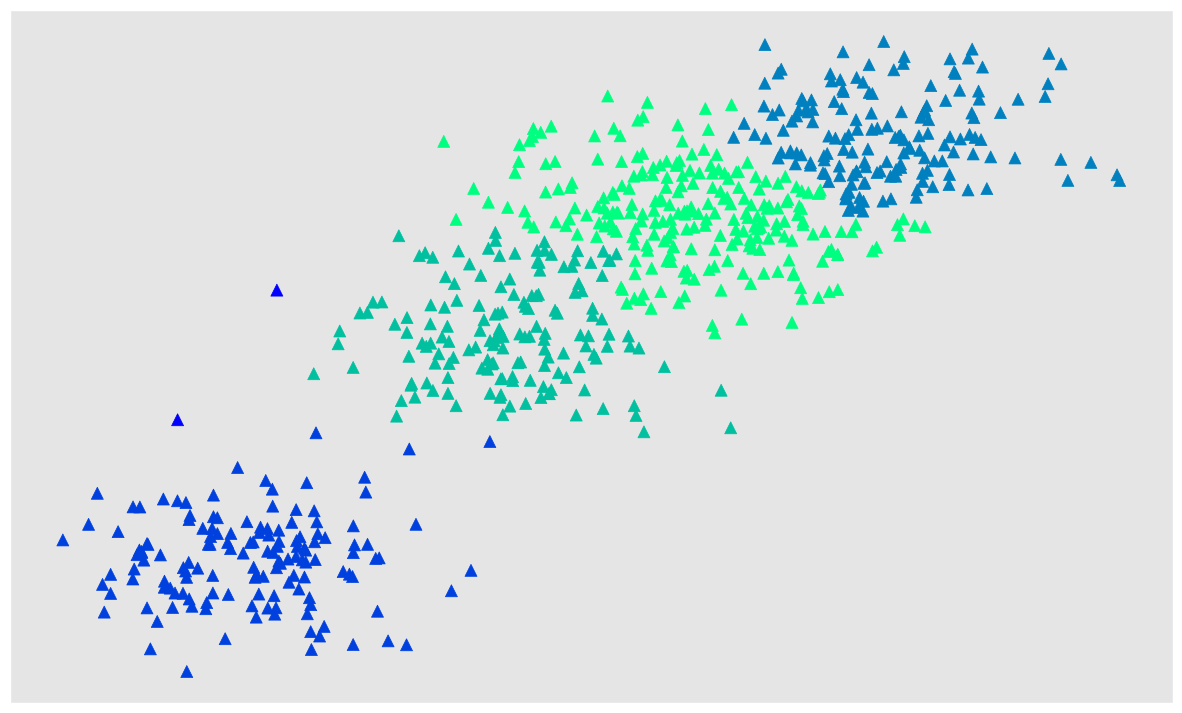

In [28]:
plt.style.use("ggplot")
plt.figure(figsize=(15,9))
plt.scatter(
            X[:, 0],
            X[:, 1],
            c = agglomerative_cluster.labels_,
            cmap = "winter",
            marker = "^",
            s = 75
           )

plt.xticks([])
plt.yticks([])
plt.show()

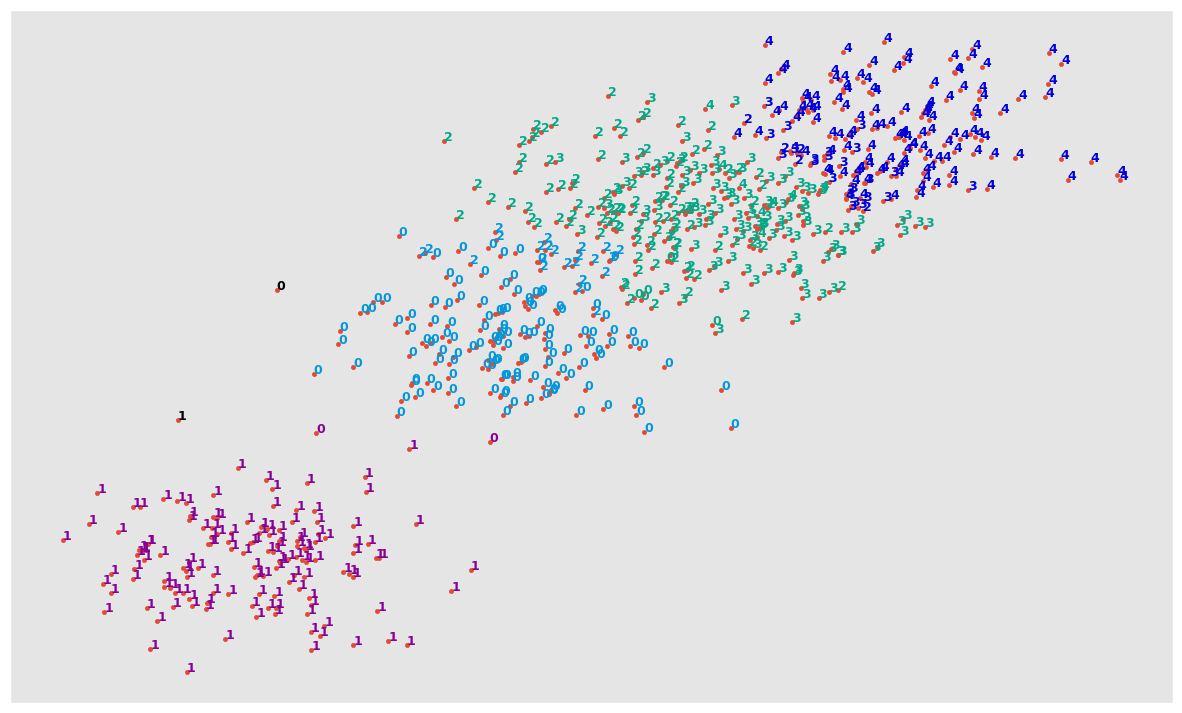

In [29]:
plt.figure(figsize=(15,9))
for i in range(X.shape[0]):
    plt.text(X[i, 0], X[i, 1], str(y[i]),
             color=plt.cm.nipy_spectral(agglomerative_cluster.labels_[i] / 10),
             fontdict={'weight': 'bold', 'size': 9})
    
plt.xticks([])
plt.yticks([])    

# Display the plot of the original data before clustering
plt.scatter(X[:, 0], X[:, 1], marker='.')
# Display the plot
plt.show()

In [ ]:
# Generate the proximity/distance matrix!
distance = distance_matrix(X, X)

# Initialzing dendrogram
graph = hierarchy.linkage(y = distance, method = "average" )

# Plotting the Dendrogram
dendro = hierarchy.dendrogram(graph)

/var/folders/wy/wgb54ckn2g13mvl5wtsq0nr40000gn/T/ipykernel_39804/3065493856.py:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  graph = hierarchy.linkage(y = distance, method = "average" )


#### Divisive Hierarchical Clustering

- **DIANA (DIvisive ANAlysis)**
- **MST-based divisive hierarchical clustering**
- **Bisecting k-means**
